# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, we will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>



<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

---

## Data Dictionary


For this assignment, we will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 2.2 MB/s eta 0:00:06
     ---- ----------------------------------- 1.6/12.8 MB 2.5 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 2.6 MB/s eta 0:00:05
     ------- -------------------------------- 2.4/12.8 MB 2.4 MB/s eta 0:00:05
     --------- ------------------------------ 2.9/12.8 MB 2.3 MB/s eta 0:00:05
     --------- ------------------------------ 3.1/12.8 MB 2.3 MB/s eta 0:00:05
     ----------- ---------------------------- 3.7/12.8 MB 2.2 MB/s eta 0:00:05
     ------------ --------------------------- 3.9/12.8 MB 2.2 MB/s eta 0:00:05
     ------------- -------------------------- 4.5/12.8 MB 2.2 MB/s eta 0:00:04
     --------------- ------------------------ 5.0/12.8 MB 2.2 MB/s eta 0:

In [2]:
!pip install seaborn

In [3]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [2]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [3]:
# Import the first file - True.csv

true=pd.read_csv('True.csv')
# Import the second file - Fake.csv


fake=pd.read_csv('Fake.csv')

## **1.** Data Preparation  





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
true.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [7]:
# Inspect the DataFrame with Fake News to understand the given data
fake.head(5)

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [10]:
# Print the column details for True News DataFrame
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [11]:
# Print the column details for Fake News Dataframe
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [12]:
# Print the column names of both DataFrames
true.columns

Index(['title', 'text', 'date'], dtype='object')

In [13]:
fake.columns

Index(['title', 'text', 'date'], dtype='object')

In [14]:
true.shape

(21417, 3)

In [15]:
fake.shape

(23523, 3)

### **1.1** Add new column  

Add new column `news_label` to both the DataFrames and assign labels

In [16]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true['news_label']=1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake['news_label']=0

In [17]:
true.head(2)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   
1  U.S. military to accept transgender recruits on Monday: Pentagon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [18]:
fake.head(2)

,title,text,date,news_label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

### **1.2** Merge DataFrames  <br>

Create a new Dataframe by merging True and Fake DataFrames

In [19]:
# Combine the true and fake news DataFrames into a single DataFrame

df=pd.concat([true,fake])


In [20]:
df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [21]:
df=df.reset_index(drop=True)

In [23]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [24]:
df.shape

(44940, 4)

### **1.3** Handle the null values  <br>

Check for null values and handle it by imputation or dropping the null values

In [25]:
# Check Presence of Null Values

df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [26]:
# Handle Rows with Null Values
df[df['title'].isnull()]

,title,text,date,news_label
31149,NaN,NaN,NaN,0
33826,NaN,NaN,NaN,0
34782,NaN,NaN,NaN,0
39273,NaN,NaN,NaN,0
41047,NaN,NaN,NaN,0
43348,NaN,NaN,NaN,0
43359,NaN,NaN,NaN,0
43410,NaN,NaN,NaN,0
43447,NaN,NaN,NaN,0
43739,NaN,NaN,NaN,0


In [27]:
df=df[~df['title'].isnull()]        #deleting rows where title is null

In [28]:

df.isnull().sum()

title          0
text           0
date          21
news_label     0
dtype: int64

In [29]:
df=df.drop(['date'],axis=1)         #dropping date column as it is not required for analysis

In [32]:
df.isnull().sum()                   #all null values handled

title         0
text          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame   <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [33]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

df['news_text']=df['title']+' '+df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
df=df.drop(['title','text'],axis=1)

# Display the first 5 rows of the updated DataFrame to check the result



In [34]:
df.head(5)

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing  <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning   <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [35]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

df_clean = pd.DataFrame()
print(df_clean)

# Add 'news_label' column to the new dataframe for topic identification


Empty DataFrame
Columns: []
Index: []


In [36]:
df_clean['news_label']=df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <br>



In [37]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
    
# Convert to lower case
    text=text.lower()
# Remove text in square brackets
    text=re.sub(r'\[.*?\]', '', text)
    text=re.sub(r'\s+', ' ',text)  
    
    
# Remove punctuation
    text=re.sub(r'[^\w\s]', '', text)

# Remove words with numbers
    text=re.sub(r'\b\w*\d\w*\b', '', text)

    return text.strip()


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame.  <br>


In [38]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['news_text_cleaned']=df['news_text'].apply(clean_text)

In [39]:
df_clean.head(2)

news_label  \
0           1   
1           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### **2.2** POS Tagging and Lemmatization   <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags  <br>



In [40]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

nlp = spacy.load("en_core_web_sm")


def pos_lemma(text):
    doc = nlp(text)
    new=[token.lemma_ for token in doc if token.pos_=='NOUN' and not token.is_stop]
    text=" ".join(new)
    return text
   

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <br>

**Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [41]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean['news_text_lemmatized']=df_clean['news_text_cleaned'].apply(pos_lemma)

In [42]:
df_clean.head(2)

news_label  \
0           1   
1           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### Save the Cleaned data as a csv file 

In [3]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [4]:
# Check the first few rows of the DataFrame

df_clean.head(3)

news_label  \
0           1   
1           1   
2           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [5]:
# Check the dimensions of the DataFrame
df_clean.shape

(44919, 3)

In [6]:
# Check the number of non-null entries and data types of each column

df_clean.isnull().sum()         ##these are due to empty strings afer cleaning text

news_label               0
news_text_cleaned        9
news_text_lemmatized    20
dtype: int64

In [7]:
df_clean=df_clean[~df_clean['news_text_lemmatized'].isnull()]

In [8]:
df_clean.isnull().sum()             

news_label              0
news_text_cleaned       0
news_text_lemmatized    0
dtype: int64

In [9]:
df_clean.shape

(44899, 3)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44899 entries, 0 to 44918
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   news_label            44899 non-null  int64 
 1   news_text_cleaned     44899 non-null  object
 2   news_text_lemmatized  44899 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## **3.** Train Validation Split <br>

In [11]:
df_clean = df_clean.sample(frac=1, random_state=42).reset_index(drop=True)    

In [14]:
df_clean.head(2)

,news_label,news_text_cleaned,news_text_lemmatized
0,0,irony mike pence shames pres obama for name calling no really mike pence the rightwing nut who is running alongside donald trump for the vice presidential position had a few words for president obama after his speech at the democratic national convention when he called trump a homegrown demogauge among other things i don t think name calling has any place in public life and i thought that was unfortunate that the president of the united states would use a term like that let alone laced into a sentence like that you read that right mike pence who s running alongside donald trump is offended that president obama would resort to name calling in publicthe irony is just too rich with this one coupled with trump having his feelings hurt by speakers at the dnc the hypocrisy from the trump camp could not be more rankthanks to the new york times we know that donald trump has insulted personally over people places and things just on twitter alonewhile pence is offended by the homegrown demogauge line he seems perfectly fine with words and lines like corrupt crooked dopey clown goofy pocahontas perv sleazebag disgrace dummy irrelevant clown moron loser wacko crazy waste of time and energy lowlife phony hokey garbage sloppy grubby buffoon bimbo dog bitch truly weirdthe list as documented by the nyt goes on and onso to mike pence please do us all a favor and shut up if you really don t want name calling in politics maybe you should talk to your running mate first considering that right after bloomberg s speech trump revived his little insult once given to marco rubiotrump and pence are buckling under the pressure of public opinion and their inability to see past their own hypocrisy is turning republicans against them as well as independentsfeatured image via sarah d davisgetty images,irony obama nut trump vice position word president speech convention demogauge thing calling place life president term sentence penny trump irony trump feeling speaker dnc hypocrisy trump camp rankthank people place thing twitter alonewhile demogauge line word line moron loser waste time energy lowlife hokey garbage dog list nyt favor politic running mate speech trump insult rubiotrump penny pressure opinion inability hypocrisy republican image image
1,1,the adoration of kim jong un pyongyang north koreans stage a demonstration of devotion to their leader kim jong un at least once a year in a large ceremonial square in pyongyang mansae the people call as they parade past the old who stands on a balcony above them live long this december kim will mark six years in power in that time he has purged or executed around people according to the institute for national security strategy a think tank of south korea s national intelligence service nis the people on parade carry flowers including north korea s national blooms kimilsungia and kimjongilia which were specially created in honor of kim s grandfather and father kim il sung and kim jong il north korea is the only socialist country to have passed power down the family line images of former presidents are pinned on the left side of every jacket and dress they are worn there to be close to the wearers hearts in private conversations some north koreans quietly lament the shortcomings of their system it s too bureaucratic takes too long to get things done is disorganized they say but few dare to openly criticize the supreme leader north korea s gdp per capita estimated at in the cia factbook places it in the world it is poorer than haiti zimbabwe and afghanistan defectors say many north koreans lead double lives earning money in unofficial market places to supplement state incomes the leadership turns a blind eye to this traditionally pyongyang has been the home of north korea s elites but the inhabitants of the capital must also prepare for the parades around this time everyone everywhere must increase production in a process known as a battle people organized i

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data


In [13]:
train_df, test_df = train_test_split(df_clean, test_size=0.3, random_state=42)

In [14]:
train_df.shape

(31429, 3)

In [15]:
test_df.shape

(13470, 3)

In [16]:
train_df.head(2)

,news_label,news_text_cleaned,news_text_lemmatized
16305,1,catalan government mulling calling snap election proindependence party cup madrid reuters the catalan government is considering calling a snap election proindependence party cup politician carles riera said on tuesday though he added that the farleft party would oppose such a move the regional elections are a weapon to cancel the referendum and the will of the majority of catalonia riera told a news conference secessionists in catalonia say that a banned independence vote held on oct which drew only a percent turnout and was mostly shunned by catalans who wish to remain in spain has accorded them a mandate to claim statehood,government election catalan government election farleft party election weapon referendum majority news conference secessionist independence vote percent turnout catalan mandate statehood
41604,0,you have to see ammon bundys ridiculous press conference in oregon video ammon bundy the son of the secessionist rancher cliven bundy held a rambling incoherent press conference on monday at the malheur national wildlife refuge in oregon the bundy rancher defended convicted ranchers dwight and steven hammond even though the hammonds don t really want help from the bundy brothers hammond attorney w alan schroeder told reporters neither ammon bundy nor anyone within his grouporganization speak for the hammond family but off he went anyway we have allowed our federal government to step outside the bounds of the constitution they have come down upon on the people ammon bundy said in a press conference monday they are coming down into the state and taking over the land and the resources putting the people into duress among other things bundy announced the name of his group citizens for constitutional freedombundy also presented a redress of grievances read by another member of his group the grievances were endorsed by other militia groups such as we re not making these up oregon bearded bastards the oregon oath keepers and the central oregon constitutional guard i know i know the oregon bearded bastards sound like they could totally annihilate the us government and its pawns in the military look out marines meanwhile the central oregon constitutional guard smartly used the word guard instead of the original suggestion central oregon constitutional klan or cock the acronym would ve been problematic jokethe big takeaway from the press conference is this the bundys are clearly milking their minutes by piggybacking their ridiculous agenda onto the hammond agenda together it s one big dumb agenda fueled by fantasies of as if there s any realistic chance that an armed conflict with the government wouldn t end with these posers in body bagsfeatured image via video screen grab,press conference son secessionist cliven bundy press conference wildlife refuge rancher rancher hammond help brother reporter grouporganization family government bound constitution people press conference state land resource people duress thing group citizen freedombundy redress grievance member group grievance militia group oath keeper guard bastard government pawn military marine guard word guard suggestion klan acronym takeaway press conference bundys minute agenda agenda agenda fantasy chance conflict government poser body image video screen grab


## **4.** Exploratory Data Analysis on Training Data   <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <br>



In [17]:
# Add a new column to calculate the character length of cleaned news text

train_df['news_text_cleaned_len']=train_df['news_text_cleaned'].apply(lambda x:len(x))
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['news_text_lemmatized_len']=train_df['news_text_lemmatized'].apply(lambda x:len(x))

In [23]:
train_df.head(2)

,news_label,news_text_cleaned,news_text_lemmatized,news_text_cleaned_len,news_text_lemmatized_len
16305,1,catalan government mulling calling snap election proindependence party cup madrid reuters the catalan government is considering calling a snap election proindependence party cup politician carles riera said on tuesday though he added that the farleft party would oppose such a move the regional elections are a weapon to cancel the referendum and the will of the majority of catalonia riera told a news conference secessionists in catalonia say that a banned independence vote held on oct which drew only a percent turnout and was mostly shunned by catalans who wish to remain in spain has accorded them a mandate to claim statehood,government election catalan government election farleft party election weapon referendum majority news conference secessionist independence vote percent turnout catalan mandate statehood,638,186
41604,0,you have to see ammon bundys ridiculous press conference in oregon video ammon bundy the son of the secessionist rancher cliven bundy held a rambling incoherent press conference on monday at the malheur national wildlife refuge in oregon the bundy rancher defended convicted ranchers dwight and steven hammond even though the hammonds don t really want help from the bundy brothers hammond attorney w alan schroeder told reporters neither ammon bundy nor anyone within his grouporganization speak for the hammond family but off he went anyway we have allowed our federal government to step outside the bounds of the constitution they have come down upon on the people ammon bundy said in a press conference monday they are coming down into the state and taking over the land and the resources putting the people into duress among other things bundy announced the name of his group citizens for constitutional freedombundy also presented a redress of grievances read by another member of his group the grievances were endorsed by other militia groups such as we re not making these up oregon bearded bastards the oregon oath keepers and the central oregon constitutional guard i know i know the oregon bearded bastards sound like they could totally annihilate the us government and its pawns in the military look out marines meanwhile the central oregon constitutional guard smartly used the word guard instead of the original suggestion central oregon constitutional klan or cock the acronym would ve been problematic jokethe big takeaway from the press conference is this the bundys are clearly milking their minutes by piggybacking their ridiculous agenda onto the hammond agenda together it s one big dumb agenda fueled by fantasies of as if there s any realistic chance that an armed conflict with the government wouldn t end with these posers in body bagsfeatured image via video screen grab,press conference son secessionist cliven bundy press conference wildlife refuge rancher rancher hammond help brother reporter grouporganization family government bound constitution people press conference state land resource people duress thing group citizen freedombundy redress grievance member group grievance militia group oath keeper guard bastard government pawn military marine guard word guard suggestion klan acronym takeaway press conference bundys minute agenda agenda agenda fantasy chance conflict government poser body image video screen grab,1899,556


##### 4.1.2  Create Histogram to visualise character lengths   <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

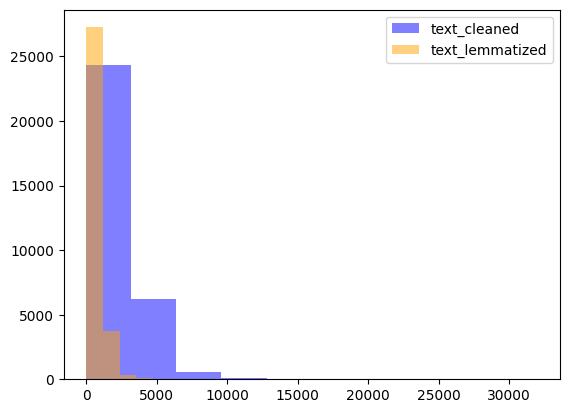

In [18]:
# Create a histogram plot to visualise character lengths


# Add histogram for cleaned news text
plt.hist(train_df['news_text_cleaned_len'],alpha=0.5, label='text_cleaned', color='blue')


# Add histogram for lemmatized news text with POS tags removed

plt.hist(train_df['news_text_lemmatized_len'],alpha=0.5, label='text_lemmatized', color='orange')
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text   <br>

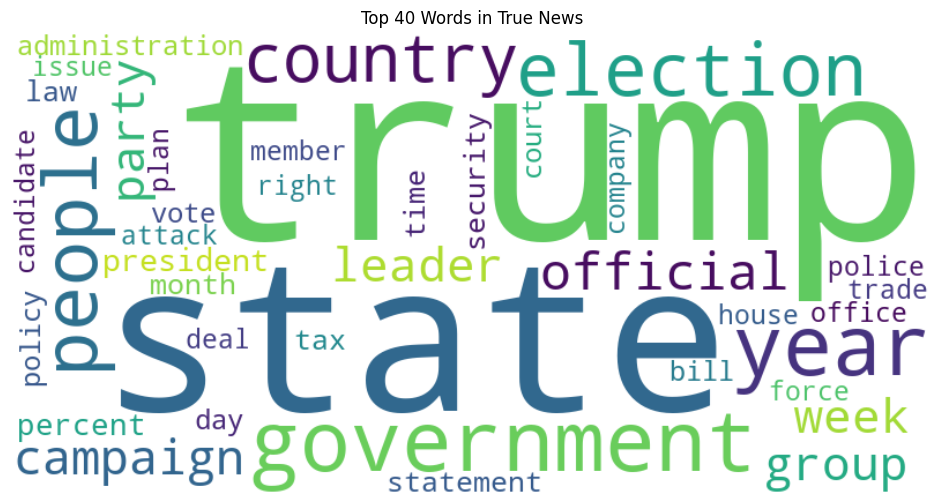

In [19]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news=train_df[train_df['news_label']==1]['news_text_lemmatized']
true_news=true_news.astype(str)

# Generate word cloud for True News


from collections import Counter
from wordcloud import WordCloud

text = " ".join(true_news.tolist())


tokens = text.split()


word_freq = Counter(tokens)


top_40 = word_freq.most_common(40)

top_words_df_true = pd.DataFrame(top_40, columns=['word', 'count'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_40))
##wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

In [20]:
top_words_df_true

,word,count
0,trump,21926
1,state,14380
2,government,13636
3,year,13303
4,people,10712
5,election,9950
6,country,9615
7,official,9332
8,campaign,7935
9,party,7678


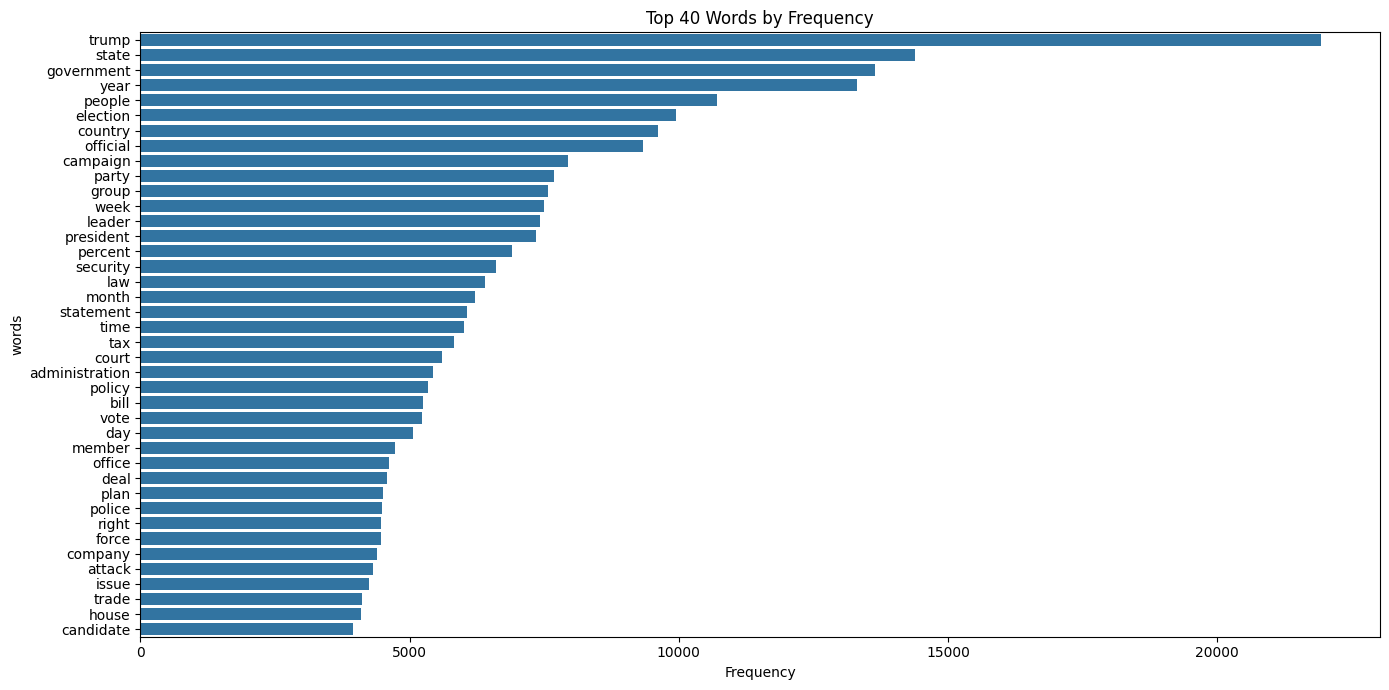

In [21]:

plt.figure(figsize=(14, 7))

# Create barplot
sns.barplot(y='word',x='count',data=top_words_df_true)

plt.title("Top 40 Words by Frequency")
plt.xlabel("Frequency")
plt.ylabel("words")

plt.tight_layout()
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <br>

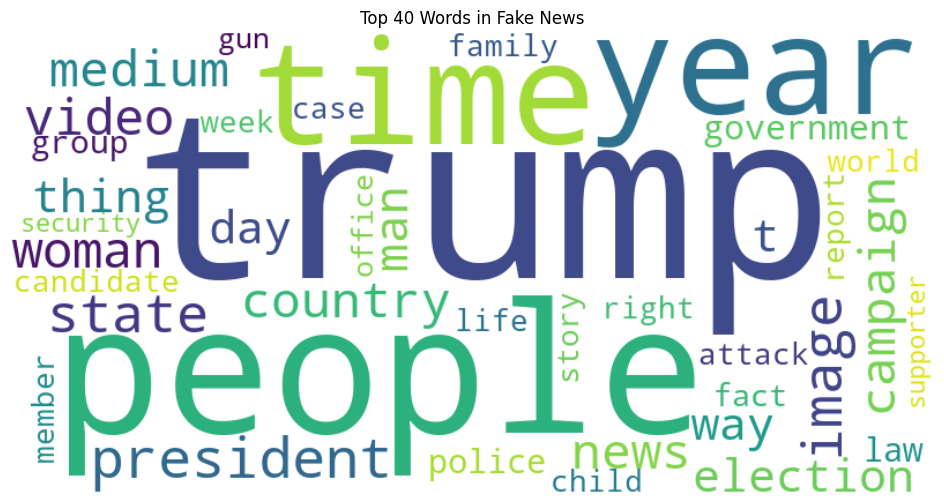

In [22]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

fake_news=train_df[train_df['news_label']==0]['news_text_lemmatized']
fake_news=fake_news.astype(str)


# Generate word cloud for Fake News


text = " ".join(fake_news.tolist())


tokens = text.split()

word_freq = Counter(tokens)
top_40 = word_freq.most_common(40)

top_words_df_fake = pd.DataFrame(top_40, columns=['word', 'count'])
top_words_df_fake

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_40))
##wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()

In [23]:
top_words_df_fake

,word,count
0,trump,34630
1,people,18449
2,time,11373
3,year,10542
4,president,10222
5,image,9727
6,state,9156
7,video,8109
8,woman,8017
9,news,7735


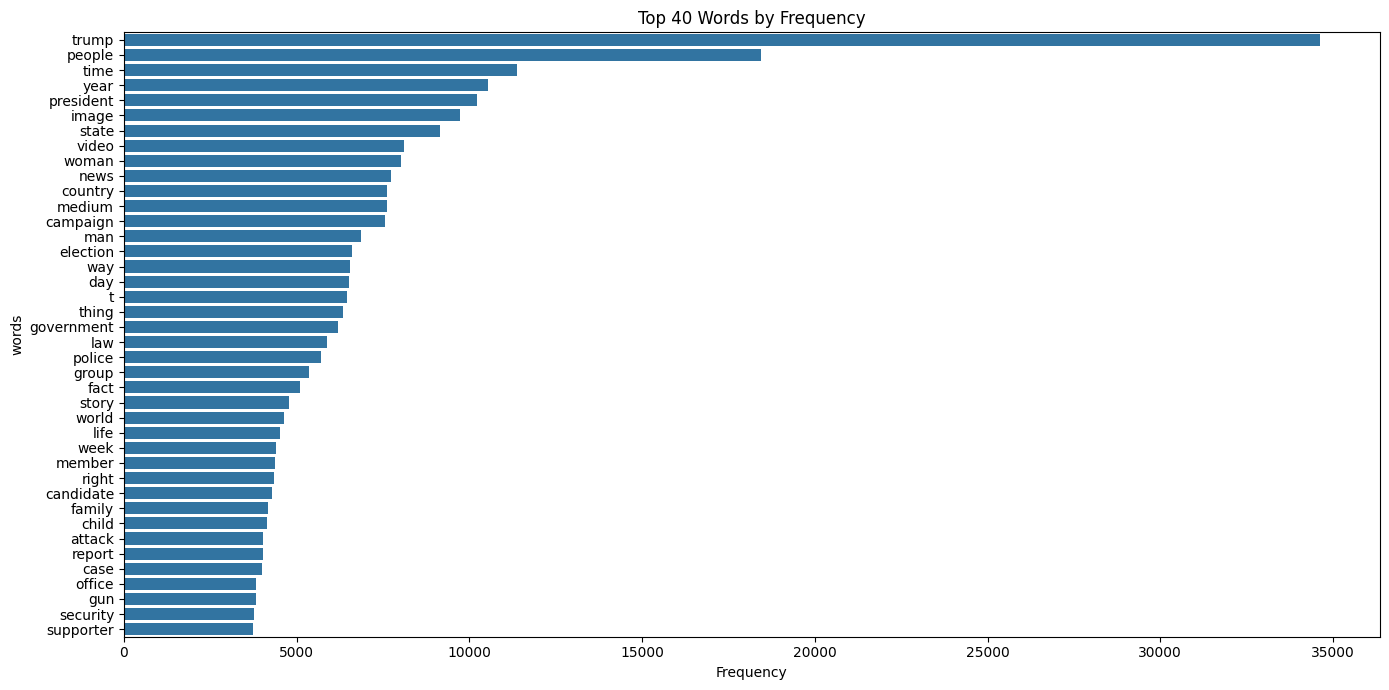

In [24]:

plt.figure(figsize=(14, 7))

# Create barplot
sns.barplot(y='word',x='count',data=top_words_df_fake)
plt.title("Top 40 Words by Frequency")
plt.xlabel("Frequency")
plt.ylabel("words")

plt.tight_layout()
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <br>




##### 4.3.1 Write a function to get the specified top n-grams   <br>



In [25]:
# Write a function to get the specified top n-grams

from nltk import ngrams

def get_top_ngrams(tokens, n, top_k):
   
    ngrams_list = list(ngrams(tokens, n))

    freq = Counter(ngrams_list)

    top_ngrams = freq.most_common(top_k)
    
    top_ngrams_str = [(" ".join(ngram), count) for ngram, count in top_ngrams]

    return pd.DataFrame(top_ngrams_str, columns=['ngram', 'frequency'])

##### 4.3.2 Handle the NaN values   <br>



In [26]:
# Handle NaN values in the text data

train_df.isnull().sum()


news_label                  0
news_text_cleaned           0
news_text_lemmatized        0
news_text_cleaned_len       0
news_text_lemmatized_len    0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <br>

In [27]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
text = " ".join(true_news.tolist())
tokens = text.split()

df_ngrams=get_top_ngrams(tokens, n=1, top_k=10)
df_ngrams

,ngram,frequency
0,trump,21926
1,state,14380
2,government,13636
3,year,13303
4,people,10712
5,election,9950
6,country,9615
7,official,9332
8,campaign,7935
9,party,7678


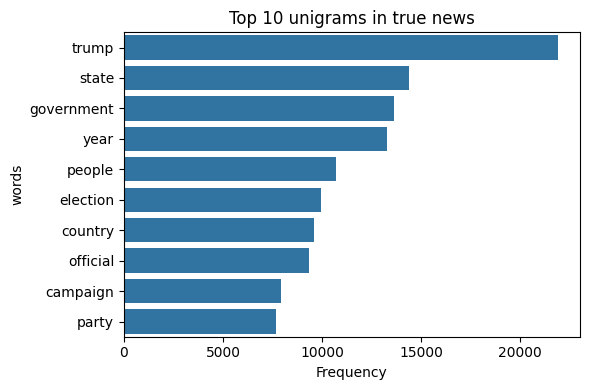

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(y='ngram',x='frequency',data=df_ngrams)
plt.title("Top 10 unigrams in true news")
plt.xlabel("Frequency")
plt.ylabel("words")
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph   <br>



In [29]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
df_ngrams=get_top_ngrams(tokens, n=2, top_k=10)
df_ngrams

,ngram,frequency
0,news conference,961
1,trump campaign,943
2,trump administration,831
3,percent percent,768
4,request comment,748
5,climate change,690
6,tax reform,688
7,security force,665
8,intelligence agency,644
9,house representative,624


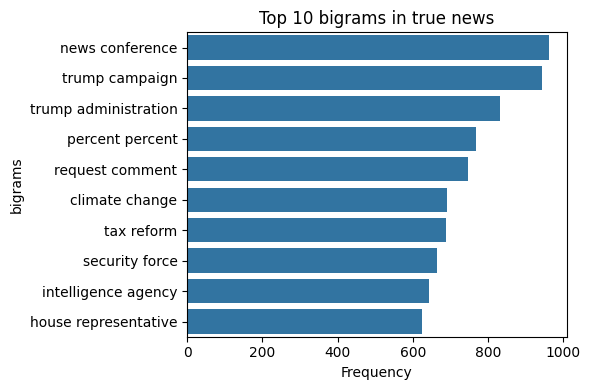

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(y='ngram',x='frequency',data=df_ngrams)
plt.title("Top 10 bigrams in true news")
plt.xlabel("Frequency")
plt.ylabel("bigrams")
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <br>



In [31]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
df_ngrams=get_top_ngrams(tokens, n=3, top_k=10)
df_ngrams

,ngram,frequency
0,official condition anonymity,230
1,tax rate percent,181
2,state department official,133
3,article staff involvement,124
4,staff involvement creation,124
5,involvement creation production,124
6,rate percent percent,121
7,circuit court appeal,120
8,percent percent percent,110
9,use email server,109


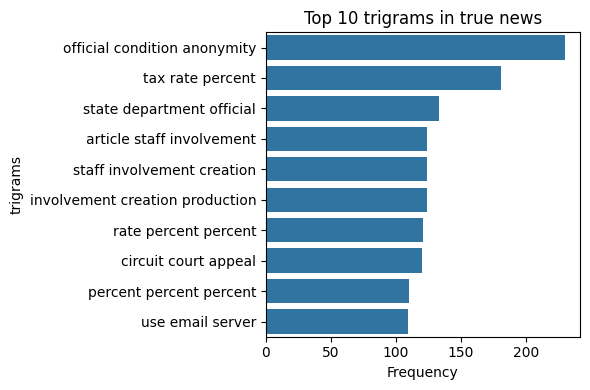

In [32]:
plt.figure(figsize=(6, 4))
sns.barplot(y='ngram',x='frequency',data=df_ngrams)
plt.title("Top 10 trigrams in true news")
plt.xlabel("Frequency")
plt.ylabel("trigrams")
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph   <br>

In [33]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
text = " ".join(fake_news.tolist())
tokens = text.split()

df_ngrams=get_top_ngrams(tokens, n=1, top_k=10)
df_ngrams

,ngram,frequency
0,trump,34630
1,people,18449
2,time,11373
3,year,10542
4,president,10222
5,image,9727
6,state,9156
7,video,8109
8,woman,8017
9,news,7735


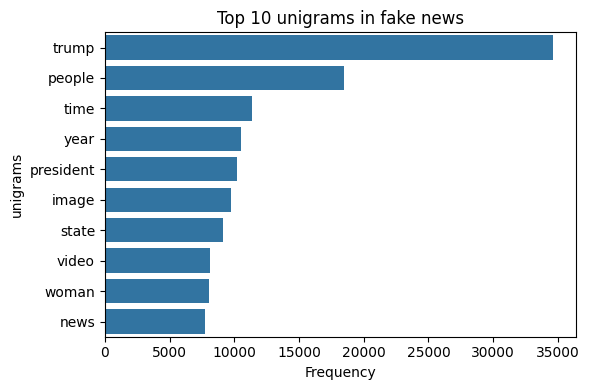

In [34]:
plt.figure(figsize=(6, 4))
sns.barplot(y='ngram',x='frequency',data=df_ngrams)
plt.title("Top 10 unigrams in fake news")
plt.xlabel("Frequency")
plt.ylabel("unigrams")
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <br>



In [35]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
df_ngrams=get_top_ngrams(tokens, n=2, top_k=10)
df_ngrams

,ngram,frequency
0,trump supporter,1438
1,century wire,1314
2,image image,1265
3,police officer,1185
4,trump campaign,1147
5,law enforcement,1076
6,donald trump,962
7,screen capture,927
8,trump realdonaldtrump,893
9,mainstream medium,762


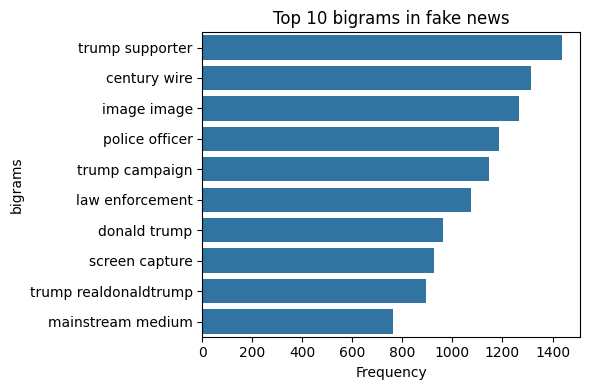

In [36]:
plt.figure(figsize=(6, 4))
sns.barplot(y='ngram',x='frequency',data=df_ngrams)
plt.title("Top 10 bigrams in fake news")
plt.xlabel("Frequency")
plt.ylabel("bigrams")
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph   <br>



In [37]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
df_ngrams=get_top_ngrams(tokens, n=3, top_k=10)
df_ngrams

,ngram,frequency
0,news century wire,635
1,video screen capture,508
2,image video screen,478
3,image getty image,416
4,image screen capture,302
5,image chip image,178
6,century wire file,173
7,law enforcement officer,166
8,image video screenshot,161
9,broadcast boiler room,143


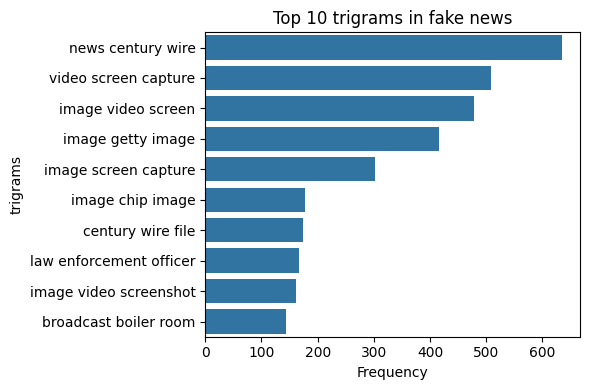

In [38]:
plt.figure(figsize=(6, 4))
sns.barplot(y='ngram',x='frequency',data=df_ngrams)
plt.title("Top 10 trigrams in fake news")
plt.xlabel("Frequency")
plt.ylabel("trigrams")
plt.tight_layout()
plt.show()

## **5.** Feature Extraction <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **5.1** Initialise Word2Vec model  

In [40]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

import gensim.downloader as api
from gensim.models import KeyedVectors
                

In [43]:
file_path =r"C:\Users\hp\Downloads\GoogleNews-vectors-negative300.bin"

# Load the model
wv = KeyedVectors.load_word2vec_format(file_path, binary=True)


### **5.2** Extract vectors for cleaned news data   

In [47]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def vectorize(text):
    tokens=text.split()
    return wv.get_mean_vector(tokens)

## Extract the target variable for the training data and validation data
y_train=train_df['news_label']
y_test=test_df['news_label']

In [50]:
train_df['vector']=train_df['news_text_lemmatized'].apply(vectorize)

In [51]:
test_df['vector']=test_df['news_text_lemmatized'].apply(vectorize)

In [73]:
train_df.head(1)

,news_label,news_text_cleaned,news_text_lemmatized,news_text_cleaned_len,news_text_lemmatized_len,vector
16305,1,catalan government mulling calling snap election proindependence party cup madrid reuters the catalan government is considering calling a snap election proindependence party cup politician carles riera said on tuesday though he added that the farleft party would oppose such a move the regional elections are a weapon to cancel the referendum and the will of the majority of catalonia riera told a news conference secessionists in catalonia say that a banned independence vote held on oct which drew only a percent turnout and was mostly shunned by catalans who wish to remain in spain has accorded them a mandate to claim statehood,government election catalan government election farleft party election weapon referendum majority news conference secessionist independence vote percent turnout catalan mandate statehood,638,186,"[-0.017196288, -0.035396427, 0.0060428074, 0.020959985, -0.0049390984, -0.047591936, 0.008637271, -0.034668256, 0.04620974, 0.009940206, -0.029762078, 0.014172587, -0.025211636, 0.061829798, -0.06534304, 0.03387311, 0.025826281, 0.037026137, 0.013954448, -0.033882186, 0.027650347, 0.029649481, 0.04112086, 0.013807595, 0.010818103, -0.012179978, 0.0031142053, 0.01045934, 0.039311826, -0.0032129544, 0.025399249, -0.0029234136, -0.0032878115, 0.016734142, 0.011823256, -0.011325231, 0.00941619, 0.039742198, -0.008015228, 0.03421516, 0.052452933, -0.011323528, 0.08698317, 0.027942171, -0.057698797, -0.03555506, -0.019867213, 0.035593394, -0.083712235, 0.037579905, 0.03449851, -0.006346588, 0.002368821, -0.00119513, -0.02647962, -0.0048257886, -0.039557837, -0.03150944, -0.028277919, -0.045910757, -0.009732796, 0.02027746, -0.02302112, -0.010454756, -0.009721151, 0.012665838, -0.032852776, 0.03528798, 0.032158416, 0.026182136, 0.030170178, 0.03269895, 0.033437114, 0.001390759, -0.030207207, -0.018737148, 0.0075593814, -0.004820156, 0.021280406, 0.021769993, 0.007156643, -0.021732565, 0.017049666, 0.005229106, -0.029834017, -0.017692108, -0.023030603, 0.009888599, 0.019855522, -0.012105511, 0.063289605, -0.04315024, -0.033806473, -0.021728832, -0.0130501045, -0.012213571, 0.0105498545, -0.036409535, 0.06051163, 0.009400634, ...]"


In [54]:
X_train=train_df['vector'].values

In [55]:
X_test=test_df['vector'].values

In [57]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (31429,)
Shape of X_test before reshaping:  (13470,)
Shape of X_train after reshaping:  (31429, 300)
Shape of X_test after reshaping:  (13470, 300)


## **6.** Model Training and Evaluation 

You will use a set of supervised models to classify the news into true or fake.

### **6.0** Import models and evaluation metrics

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **6.1** Build Logistic Regression Model 

##### 6.1.1 Create and train logistic regression model on training data  

In [59]:
## Initialise Logistic Regression model

model = LogisticRegression(max_iter=1000)

## Train Logistic Regression model on training data
model.fit(X_train_2d, y_train)

## Predict on validation data

y_pred = model.predict(X_test_2d)


##### 6.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data 

In [60]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.8781
Precision: 0.8664
Recall   : 0.8755
F1 Score : 0.8709


In [63]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7142
           1       0.87      0.88      0.87      6328

    accuracy                           0.88     13470
   macro avg       0.88      0.88      0.88     13470
weighted avg       0.88      0.88      0.88     13470



### **6.2** Build Decision Tree Model 

##### 6.2.1 Create and train a decision tree model on training data 

In [64]:
## Initialise Decision Tree model

dt_model = DecisionTreeClassifier(random_state=42)


## Train Decision Tree model on training data
dt_model.fit(X_train_2d, y_train)
## Predict on validation data
y_pred = dt_model.predict(X_test_2d)


##### 6.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data 

In [65]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.8199
Precision: 0.8168
Recall   : 0.7949
F1 Score : 0.8057


In [66]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7142
           1       0.82      0.79      0.81      6328

    accuracy                           0.82     13470
   macro avg       0.82      0.82      0.82     13470
weighted avg       0.82      0.82      0.82     13470



In [68]:

from sklearn.model_selection import GridSearchCV


# Define parameter grid
param_grid = {
    'max_depth': [5, 10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create base model
dt = DecisionTreeClassifier(random_state=42)

# Setup grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Run grid search
grid_search.fit(X_train_2d, y_train)

# Best model
best_dt = grid_search.best_estimator_


y_pred = best_dt.predict(X_test_2d)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print best params and metrics
print("Best Parameters:", grid_search.best_params_)
print(f"\nAccuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Accuracy : 0.8139
Precision: 0.8106
Recall   : 0.7879
F1 Score : 0.7991

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7142
           1       0.81      0.79      0.80      6328

    accuracy                           0.81     13470
   macro avg       0.81      0.81      0.81     13470
weighted avg       0.81      0.81      0.81     13470



### **6.3** Build Random Forest Model 


##### 6.3.1 Create and train a random forest model on training data 

In [69]:
## Initialise Random Forest model

rf = RandomForestClassifier(random_state=42)

## Train Random Forest model on training data
rf.fit(X_train_2d, y_train)
## Predict on validation data
y_pred = rf.predict(X_test_2d)


 ##### 6.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data 

In [70]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.9033
Precision: 0.8978
Recall   : 0.8963
F1 Score : 0.8970


In [71]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7142
           1       0.90      0.90      0.90      6328

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



In [72]:


# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                    
    scoring='accuracy',          
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train_2d, y_train)


best_rf = grid_search.best_estimator_
best_rf.fit(X_train_2d, y_train) 

y_pred = best_rf.predict(X_test_2d)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print(f"\nAccuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy : 0.9040
Precision: 0.8990
Recall   : 0.8963
F1 Score : 0.8977

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7142
           1       0.90      0.90      0.90      6328

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

<small> True news tends to use more factual and neutral words. Semantic word embeddings (like Word2Vec) capture the contextual meaning of words, helping differentiate differences in word usage patterns between real and fake news.
It improves the ability to detect fake news by leveraging meaning and context, not just keywords or simple lexical features

<small>Random Forest Classifier emerged as the best performing model.

<small>F1-score was prioritized as the key evaluation metric because it balances precision and recall. Since false positives and false negatives are both costly, incorrectly flagging real news and missing fake news have significant consequences.

<small>Using semantic word embeddings provided rich contextual representations, enabling the classifier to capture language differences between true and fake news.Random Forest model’s ensemble nature improved generalization over simpler classifiers.

<small>This approach significantly improves automated fake news detection accuracy compared to baseline lexical or keyword-based methods.The balanced focus on precision and recall helps minimize harmful consequences from misclassification.</small>
